In [1]:
using PyPlot
include("saltsolver.jl")
include("passive.jl")

function mirrorflip(E)
    Eaug = [E[end]; E]
    flipdim(Eaug,1)[2:end]
end

function coefs(f, Es)
    dot(Es[1], f)/norm(Es[1])^2, dot(Es[2], f)/norm(Es[2])^2
end

/Users/davidliu/.julia/v0.4/Conda/deps/usr/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


smallest_stability_eigs (generic function with 1 method)

In [31]:
n = 5
N = n * 30
L = 1.0
h = L/N
x = linspace(h, L, N)
F = 1 + 0.2 * cos(2π*n*x)
M = zeros(N, N)
laplacian!(J) = periodic!(J, h)
laplacian!(M)
Λ, X = eig(M)
reverse!(Λ)
X = X[:, reverse(1:N)]
ωs = √-Λ;

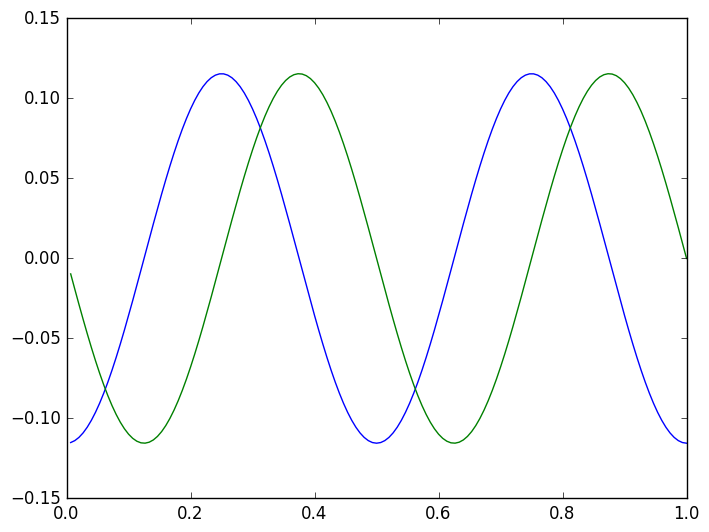

ω = 12.56269611875988
<Ee | Eo> = 8.890457814381136e-18


In [140]:
ieig = 4
ℓ = 2
Ee, Eo = X[:, ieig], X[:, ieig+1]
ω = ωs[ieig]
plot(x, Ee, x, Eo)
println("ω = ", ω)
println("<Ee | Eo> = ", dot(Ee, Eo))

In [143]:
ωa = 12.0
γ⟂ = 1.0
ɛ = (1 + im*0.3) * ones(N)
las = Laser(ɛ, F, ωa, γ⟂)
pmd = PassiveMode(copy(Ee), ω)
D = 0.3
passive_solve!(laplacian!, pmd, las, D, isprint=true)
imag(pmd.ω)

|f| = 207.32928656201105
|f| = 51.662498765208
|f| = 2.714347931963066
|f| = 0.007232364337172671
|f| = 5.3758379401229954e-8
|f| = 4.386924578389729e-11


-0.025434919410750694

In [154]:
Dt = passive_threshold!(laplacian!, pmd, las, (D, D*1.05))
ωt = real(pmd.ω)
println("imag(ω) = ", imag(pmd.ω))
println("note: mode no longer exactly symmetric")

imag(ω) = 2.3835377135501547e-12

In [173]:
pmdchiral = PassiveMode(project_chiral(pmd.E, n, ℓ), pmd.ω)
passive_solve!(laplacian!, pmdchiral, las, Dt, isprint=true)
println("instantly solved")
E₊ = copy(pmdchiral.E)
E₋ = mirrorflip(E₊)
Ep = E₊ + E₋
Em = E₊ - E₋;
println("also, recall that for ℓ≠4, Ee and Eo not rotations of one another")
println(norm(Ep - mirrorflip(Ep)))
println(norm(Em + mirrorflip(Em)))
H, Is, Js, Ks, GD = overlap_integrals((E₊, E₋), ωt, Dt, las, n, ℓ, L);

|f| = 8.006456163170635e-11
instantly solved
also, recall that for ℓ≠4, Ee and Eo not rotations of one another
0.0
0.0


In [185]:
csq = 0.01
md = Mode(copy(E₊), ωt, csq)
d = 0.01
D = Dt*(1+d)
solve!(laplacian!, md, las, D)
md.c²

0.01040297826734569

In [209]:
I = Is[1]
ω1 = -imag(GD/I)/imag(H/I)
a = sqrt(real((ω1*H+GD)/I))
as = coefs(sqrt(md.c²)*md.E, (E₊, E₋))
println("ω - ωt - ω1*d)/(ω1*d) = ", (md.ω - ωt - ω1*d)/(ω1*d))
println("(coef₊/√d - a)/a = ", (as[1]/sqrt(d)-a)/a)

ω - ωt - ω1*d)/(ω1*d) = -0.006750429632991793
(coef₊/√d - a)/a = 4.4651376934223467e-7 - 5.025463468620499e-5im
